In [1]:
import os
import sys
# Add src/ to sys.path (relative to current notebook)
sys.path.append(os.path.abspath("../../src"))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib

from utils.DataAnalysis import TableAnalysis, MyCustomException
from utils.VariableAnalysis import UnivariateAnalysis,BivariateAnalysis
from utils.pdf_file_save import PDFReportWriter

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

### Helper Functions

In [2]:
os.getcwd()

'd:\\Capstone Project\\House_Pricing\\notebook\\data_wrangling'

In [3]:
file_path = pathlib.Path('D:\Capstone Project\dataset\House_Price_dataset')

In [4]:
df = pd.read_csv(f"{file_path}/5.gurgaon_properties_cleaned_v2.csv")
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,vipul tatvam villa,sector 48,7.35,22812.0,3222.0,Plot area 358(299.33 sq.m.),4,5,2,2.0,South,Moderately Old,NaN,3222.0,NaN,1,1,1,1,0,2,144
1,flat,signature global park,sohna road,0.54,6388.0,845.0,Super Built up area 845.3(78.53 sq.m.)Carpet a...,2,2,3,4.0,East,New Property,845.3,NaN,528.3,0,0,0,0,0,0,44
2,flat,godrej oasis,sector 88a,1.00,6896.0,1450.0,Carpet area: 1450 (134.71 sq.m.),2,2,3,7.0,NaN,Relatively New,NaN,NaN,1450.0,1,0,0,0,0,0,72
3,flat,green court,sector 90,0.47,6811.0,690.0,Carpet area: 690 (64.1 sq.m.),2,2,1,0.0,East,New Property,NaN,NaN,690.0,0,0,0,0,0,0,49
4,flat,m3m the marina,sector 68,2.22,14322.0,1550.0,Super Built up area 1550(144 sq.m.),3,2,3,4.0,East,Relatively New,1550.0,NaN,NaN,0,0,0,0,0,0,44


In [5]:
df.shape

(3803, 23)

In [6]:
## Parent Class Test
da_analysis = TableAnalysis(df)
print(da_analysis)

Rows: 3803
Columns: 23
Duplicates: 125
For Duplicate Records: ShowDuplicates()


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
## Parent Class Test
da_analysis = TableAnalysis(df)
print(da_analysis)

Rows: 3678
Columns: 23


In [9]:
da_analysis.CategoricalFeatureSummary()

,field,non_null_count,null_count,null%,dtype,unique_count,top_value,top_count,top_pct,top_3,top_3_pct,rare(<1%)_count,singleton_count,entropy,dominance_ratio,is_binary,high_cardinality
0,property_type,3678,0,0.0000,object,2,flat,2819,76.64,"[flat, house]","[76.64, 23.36]",0,0,0.5435,0.7664,True,False
1,society,3677,1,0.0272,object,677,independent,486,13.21,"[independent, tulip violet, ss the leaf]","[13.21, 2.04, 1.98]",672,309,5.4380,0.1321,False,True
2,sector,3678,0,0.0000,object,115,sohna road,154,4.19,"[sohna road, sector 85, sector 102]","[4.19, 2.94, 2.91]",74,1,4.3887,0.0419,False,True
3,areaWithType,3678,0,0.0000,object,2355,Plot area 360(301.01 sq.m.),37,1.01,"[Plot area 360(301.01 sq.m.), Plot area 300(25...","[1.01, 0.71, 0.52]",2354,1849,7.4545,0.0101,False,True
4,balcony,3678,0,0.0000,object,5,3+,1172,31.87,"[3+, 3, 2]","[31.87, 29.23, 24.03]",0,0,1.4446,0.3187,False,False
5,facing,2633,1045,28.4122,object,9,NaN,1045,28.41,"[nan, North-East, East]","[28.41, 16.97, 16.94]",0,0,1.9830,0.2841,False,False
6,agePossession,3678,0,0.0000,object,6,Relatively New,1646,44.75,"[Relatively New, New Property, Moderately Old]","[44.75, 16.12, 15.31]",0,0,1.5443,0.4475,False,False


In [10]:
da_analysis.NumericalFeatureSummary()

,field,non_null_count,null_count,null%,dtype,min,max,mean,median,std,var (M),1 %,5 %,25 %,50 %,75 %,95 %,99 %,IQR,lower_bound,upper_bound,outliers_count,outlier_percentage,skewness,kurtosis,distribution_summary
0,price,3661,17,0.4622,float64,0.07,31.5,2.53,1.52,2.98,0.00,0.25,0.37,0.95,1.52,2.75,8.5,15.26,1.8,-1.75,5.45,425,11.61,3.28,14.94,"Highly Skewed (Positive: tail on the right), V..."
1,price_per_sqft,3661,17,0.4622,float64,4.00,600000.0,13891.29,9020.00,23207.05,538.57,3299.40,4716.00,6818.00,9020.00,13878.00,33333.0,85026.80,7060.0,-3772.00,24468.00,354,9.67,11.44,186.98,"Highly Skewed (Positive: tail on the right), V..."
2,area,3661,17,0.4622,float64,50.00,875000.0,2887.96,1733.00,23164.35,536.59,250.00,519.00,1233.00,1733.00,2300.00,4246.0,8068.00,1067.0,-367.50,3900.50,216,5.90,29.74,942.29,"Highly Skewed (Positive: tail on the right), V..."
3,bedRoom,3678,0,0.0000,int64,1.00,21.0,3.36,3.00,1.90,0.00,1.00,2.00,2.00,3.00,4.00,6.0,12.00,2.0,-1.00,7.00,143,3.89,3.49,18.22,"Highly Skewed (Positive: tail on the right), V..."
4,bathroom,3678,0,0.0000,int64,1.00,21.0,3.42,3.00,1.95,0.00,1.00,2.00,2.00,3.00,4.00,6.0,12.00,2.0,-1.00,7.00,126,3.43,3.25,17.55,"Highly Skewed (Positive: tail on the right), V..."
5,floorNum,3659,19,0.5166,float64,0.00,51.0,6.80,5.00,6.01,0.00,0.00,1.00,2.00,5.00,10.00,18.0,27.00,8.0,-10.00,22.00,81,2.21,1.69,4.52,"Highly Skewed (Positive: tail on the right), L..."
6,super_built_up_area,1875,1803,49.0212,float64,89.00,10000.0,1925.24,1828.00,764.17,0.58,520.36,767.00,1479.50,1828.00,2215.00,3185.0,4636.68,735.5,376.25,3318.25,89,4.75,1.84,10.35,"Highly Skewed (Positive: tail on the right), V..."
7,built_up_area,1691,1987,54.0239,float64,2.00,737147.0,2379.09,1650.00,17937.58,321.76,61.90,240.50,1100.00,1650.00,2400.00,4690.0,7455.00,1300.0,-850.00,4350.00,127,7.51,40.72,1668.86,"Highly Skewed (Positive: tail on the right), V..."
8,carpet_area,1872,1806,49.1028,float64,15.00,607936.0,2529.18,1300.00,22799.84,519.83,92.31,350.00,843.00,1300.00,1790.00,2950.0,6859.50,947.0,-577.50,3210.50,78,4.17,24.33,604.54,"Highly Skewed (Positive: tail on the right), V..."
9,study room,3678,0,0.0000,int64,0.00,1.0,0.19,0.00,0.39,0.00,0.00,0.00,0.00,0.00,0.00,1.0,1.00,0.0,0.00,0.00,705,19.17,1.57,0.46,"Highly Skewed (Positive: tail on the right), M..."


In [11]:
da_analysis.get_outliers_for_column(column='price')

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,vipul tatvam villa,sector 48,7.35,22812.0,3222.0,Plot area 358(299.33 sq.m.),4,5,2,2.0,South,Moderately Old,NaN,3222.0,NaN,1,1,1,1,0,2,144
20,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,2,42
22,flat,central park resort belgravia residences,sector 48,6.25,24300.0,2572.0,Carpet area: 2880 (267.56 sq.m.),3,5,3+,5.0,South-East,Moderately Old,NaN,NaN,2880.0,0,1,0,0,0,2,49
23,house,independent,sector 38,8.00,230547.0,347.0,Built Up area: 347 (32.24 sq.m.)Carpet area: 2...,10,10,3+,1.0,North,Undefined,NaN,347.0,215.0,0,0,0,0,0,0,0
32,house,unitech uniworld resorts,sector 33,9.50,173992.0,546.0,Plot area 546(50.73 sq.m.),6,6,3+,3.0,North-East,Moderately Old,NaN,546.0,NaN,0,0,0,0,0,2,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3731,house,dlf city plots,sector 26,18.00,39841.0,4518.0,Plot area 502(419.74 sq.m.),6,6,2,3.0,North,Old Property,NaN,4518.0,NaN,0,1,0,1,1,2,49
3732,house,dlf city plots phase 2,sector 25,10.00,400000.0,250.0,Plot area 250(23.23 sq.m.),12,12,3+,4.0,North,Relatively New,NaN,250.0,NaN,1,1,0,0,0,2,114
3739,house,unitech escape,sector 50,12.00,37037.0,3240.0,Carpet area: 360 (301.01 sq.m.),5,6,3+,3.0,East,Undefined,NaN,NaN,360.0,0,0,0,0,0,0,66
3783,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,0,60


# --------------- 1. Univariate Analysis Categorical Column ------------------

In [12]:
## Class Instantiation 
df_uni = UnivariateAnalysis(df) 
column_type = df_uni.ColumnVariable()

dict_keys(['categorical_columns', 'numerical_columns'])


In [13]:
categorical_columns = column_type.get('categorical_columns')
numerical_columns = column_type.get('numerical_columns')

In [14]:
categorical_columns

['property_type',
 'society',
 'sector',
 'areaWithType',
 'balcony',
 'facing',
 'agePossession']

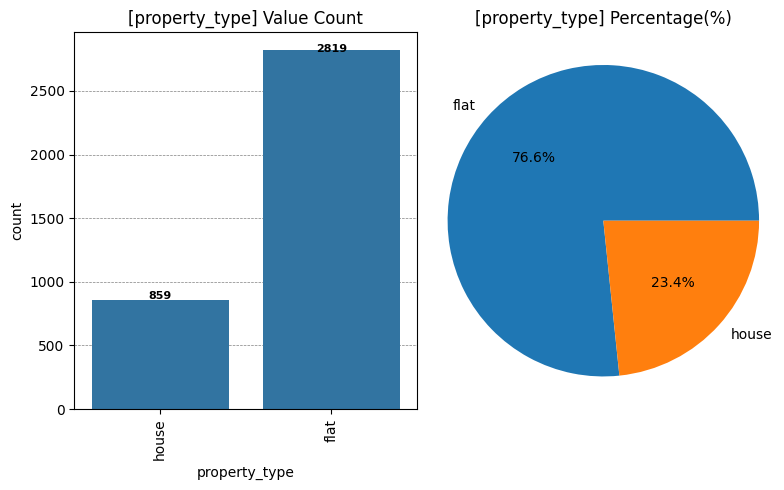

[society] Has Higher Unique Values, Picked Top Higher Frequency Value


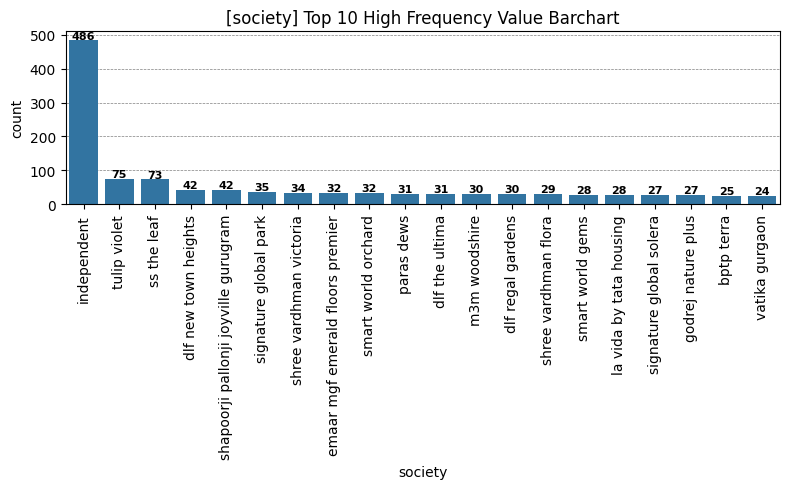

[sector] Has Higher Unique Values, Picked Top Higher Frequency Value


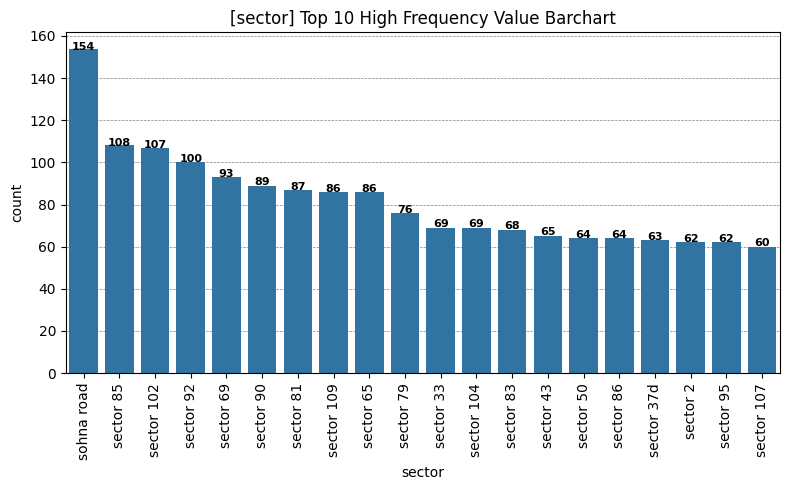

[areaWithType] Has Higher Unique Values, Picked Top Higher Frequency Value


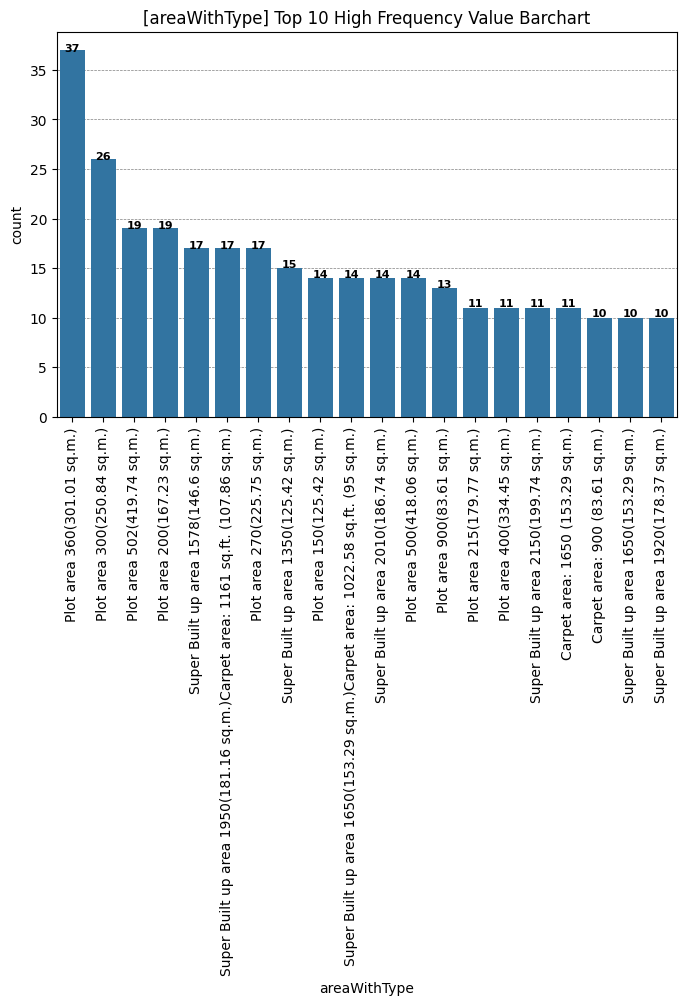

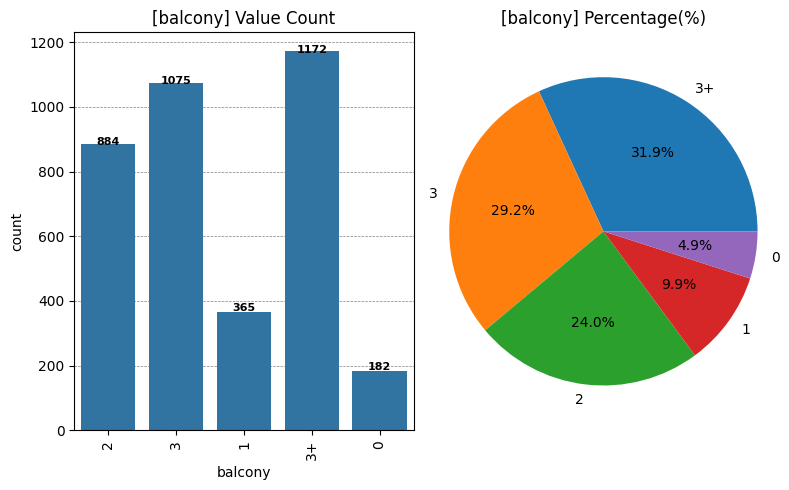

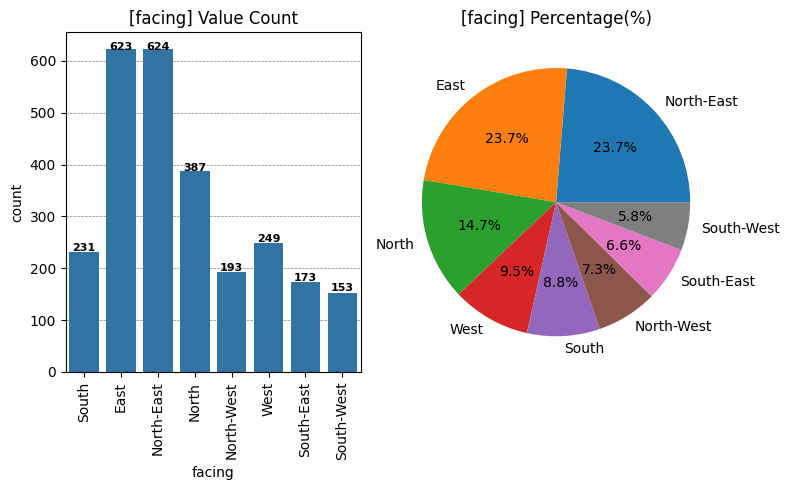

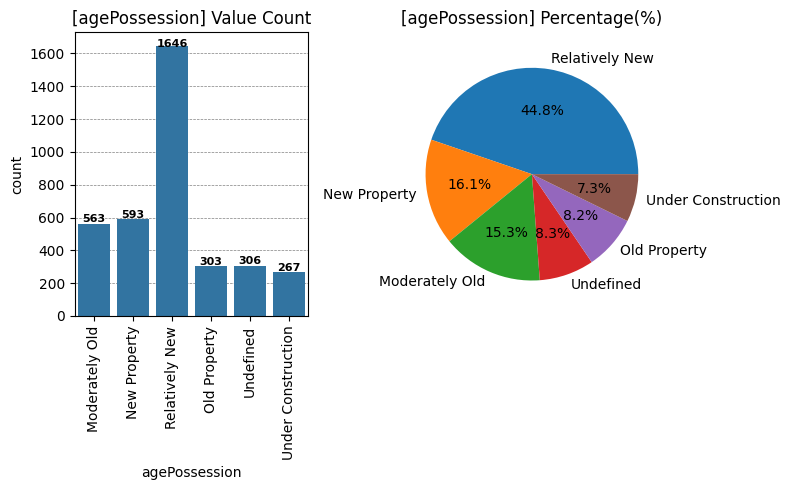

In [15]:
### Categorical Column Analysis
for each in categorical_columns:
    df_uni.CategoricalFeaturesAnalysis(each)

# property_type_observation = df_uni.CategoricalFeaturesAnalysis('property_type')


# ---------------2. Univariate Analysis Numerical Column -------------------

#### [Price] Column Deep Analysis 

In [16]:
numerical_columns

['price',
 'price_per_sqft',
 'area',
 'bedRoom',
 'bathroom',
 'floorNum',
 'super_built_up_area',
 'built_up_area',
 'carpet_area',
 'study room',
 'servant room',
 'store room',
 'pooja room',
 'others',
 'furnishing_type',
 'luxury_score']

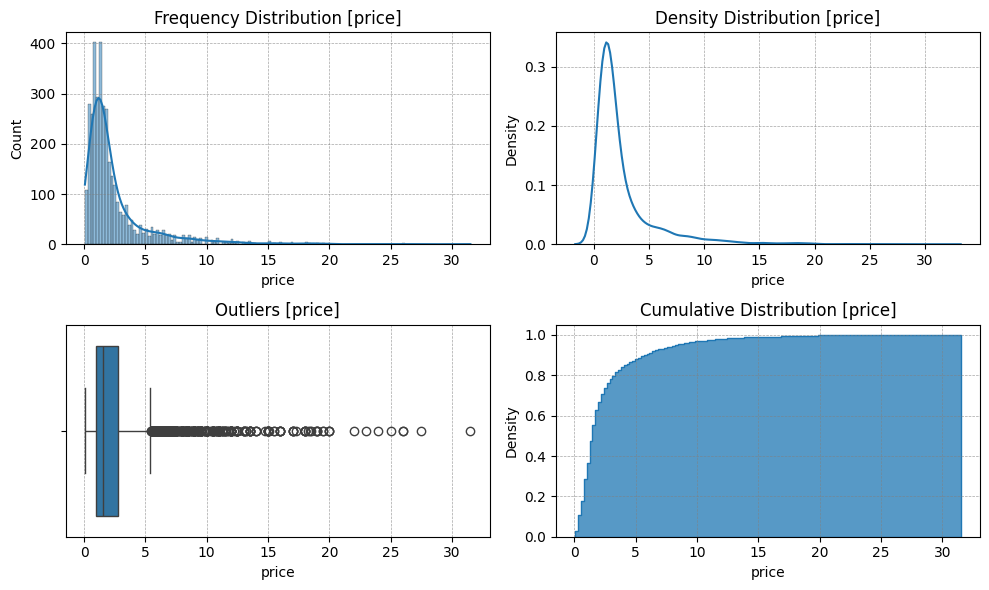

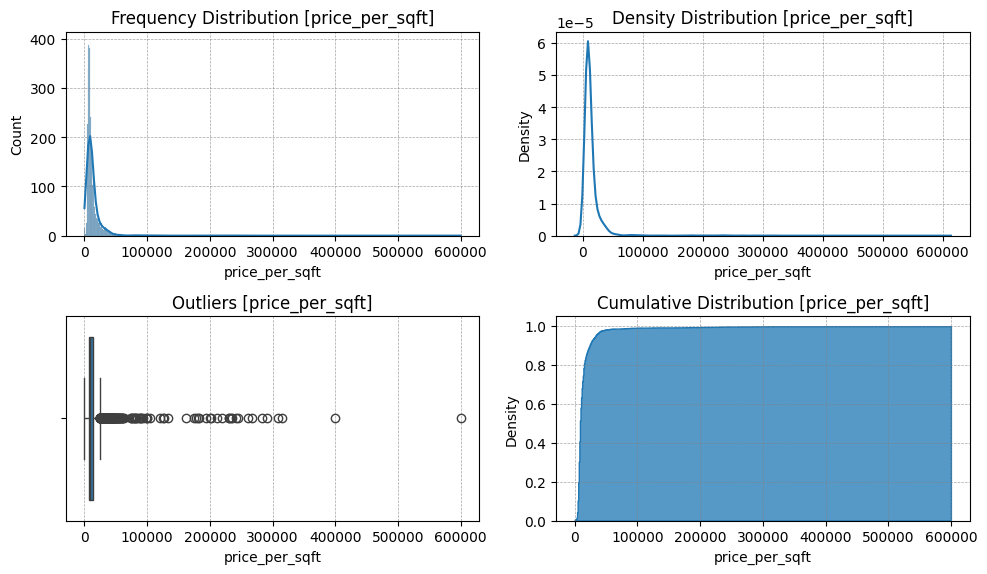

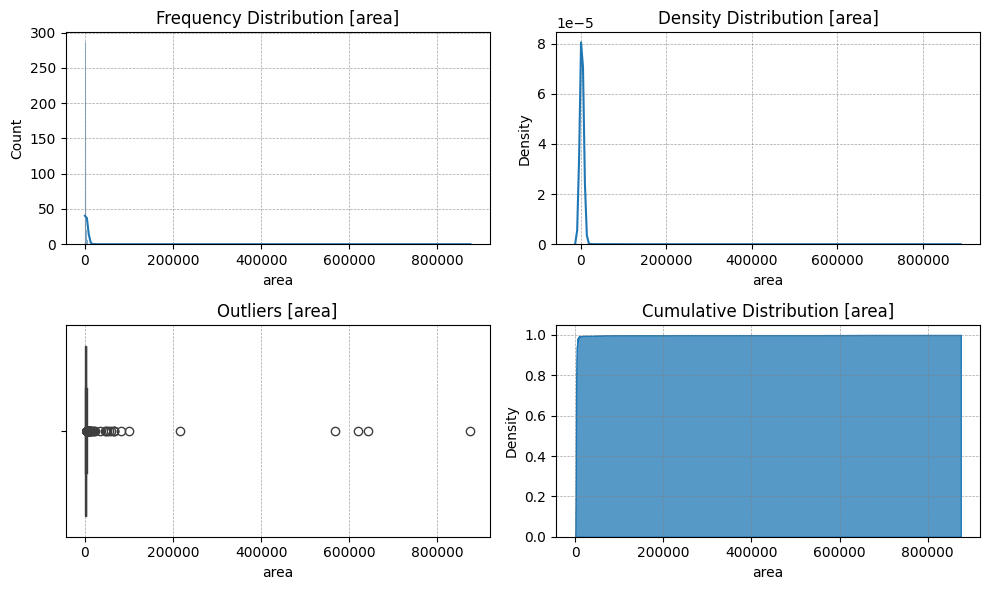

Considered Descrete - Low Cardinality: bedRoom(int64)


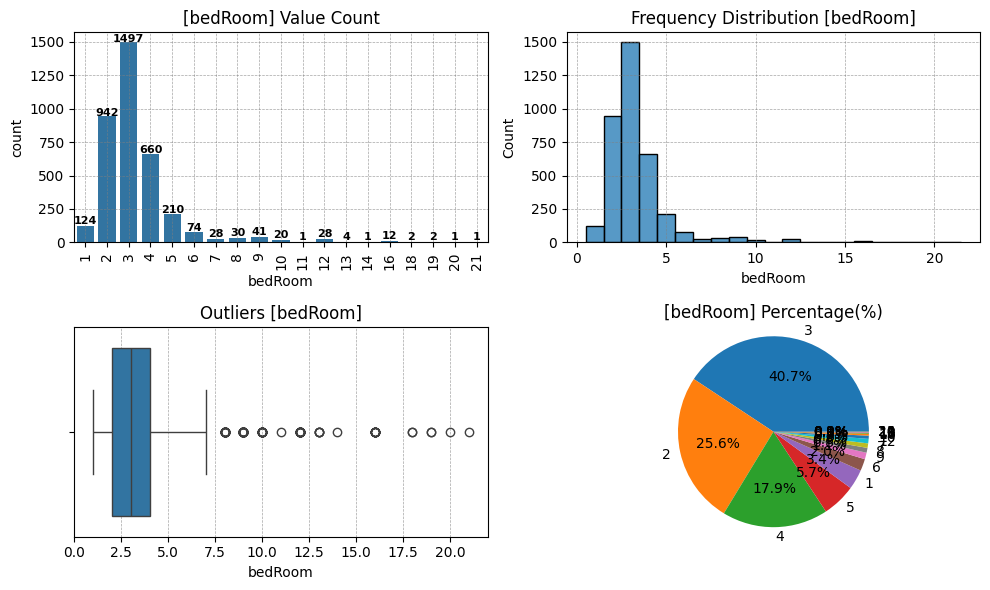

Considered Descrete - Low Cardinality: bathroom(int64)


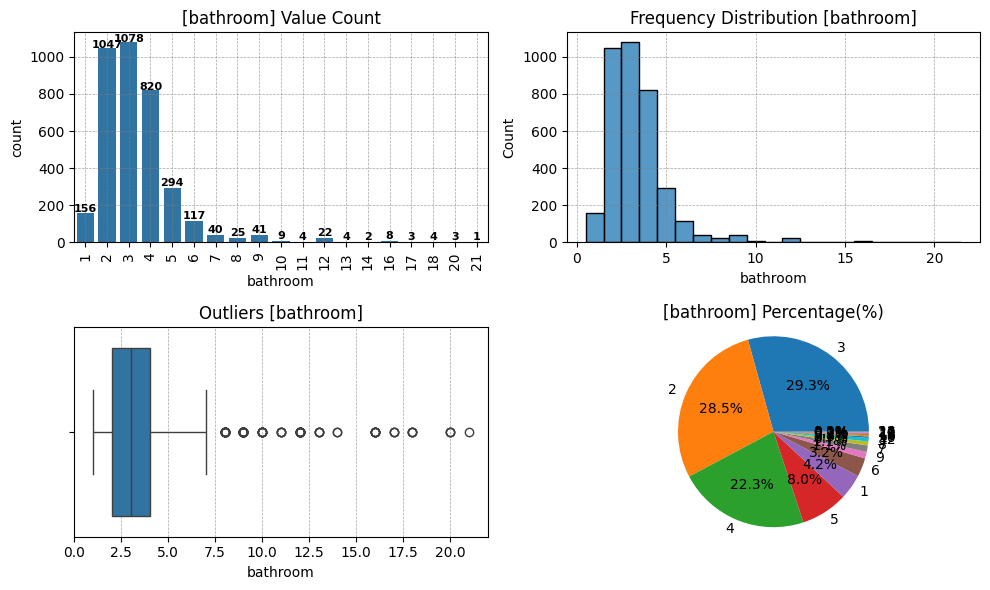

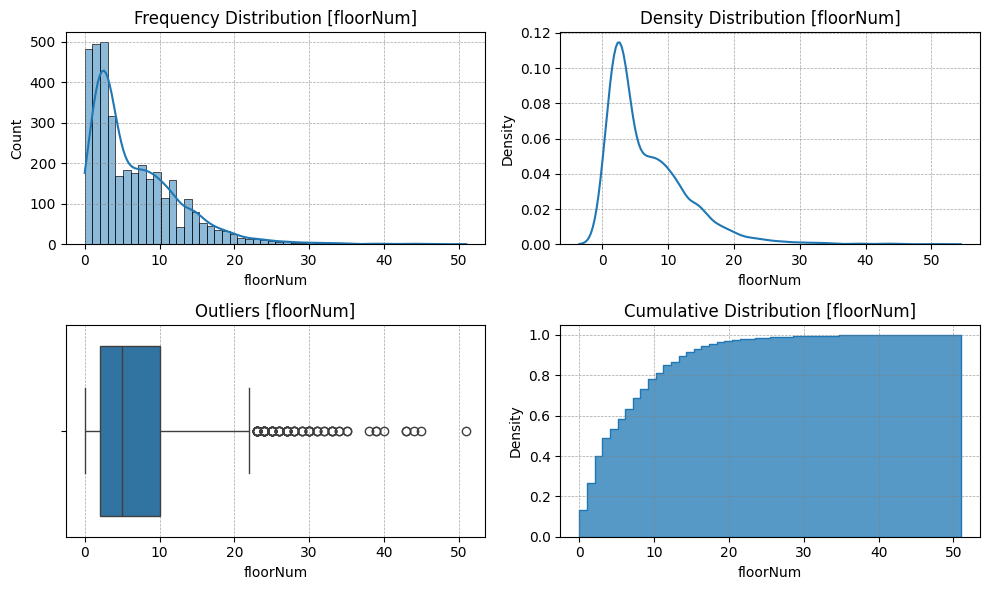

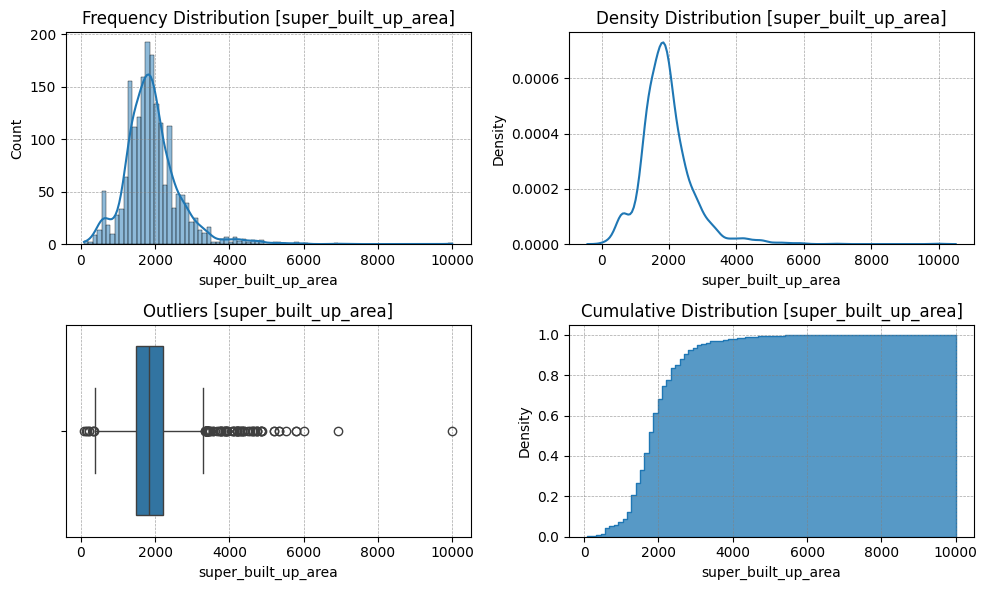

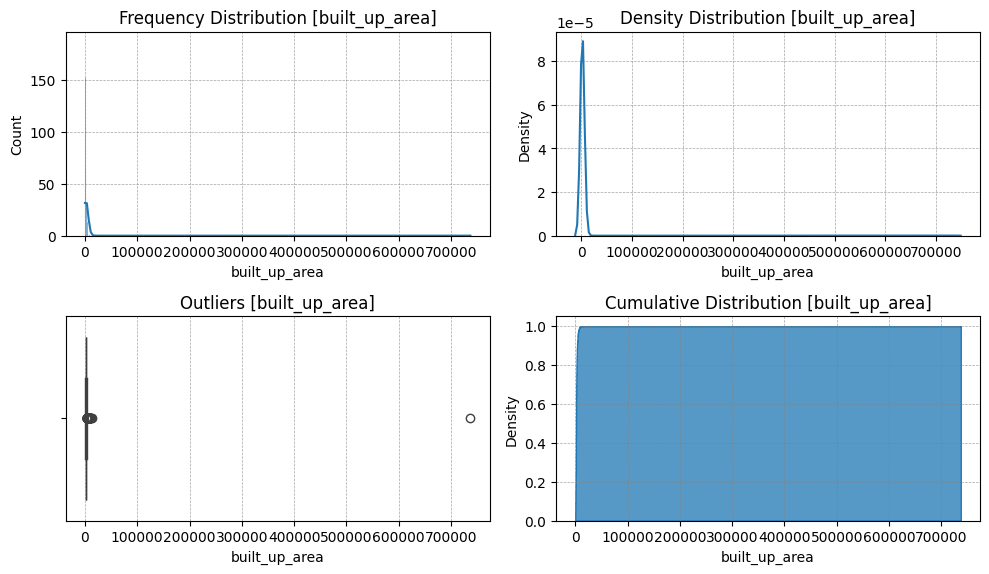

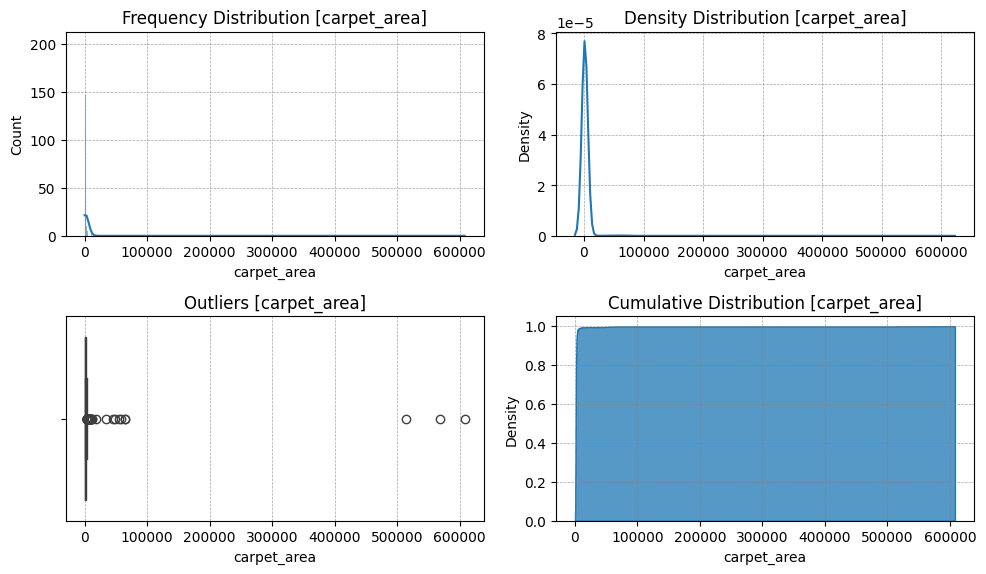

Considered Descrete - Low Cardinality: study room(int64)


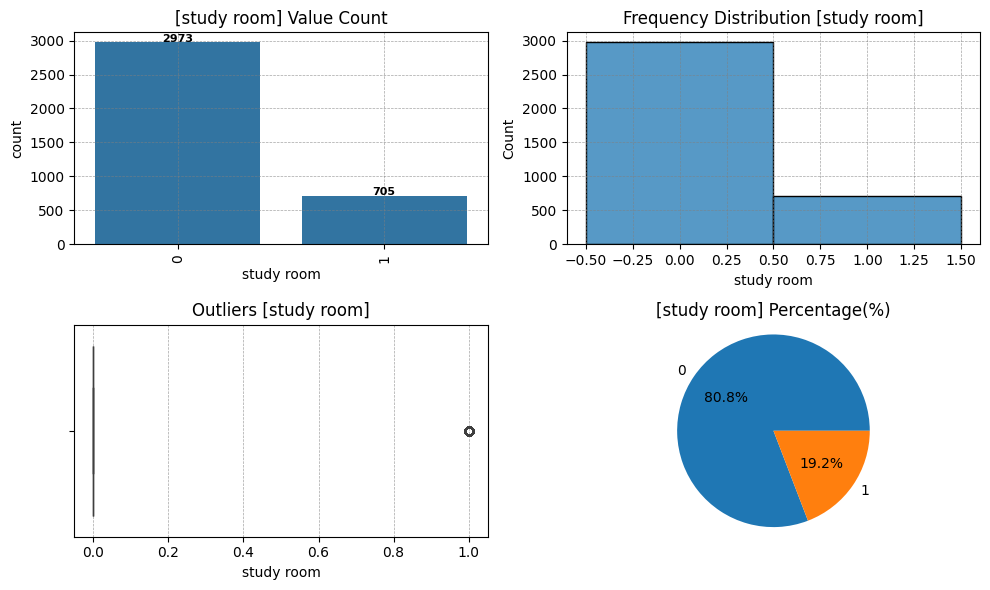

Considered Descrete - Low Cardinality: servant room(int64)


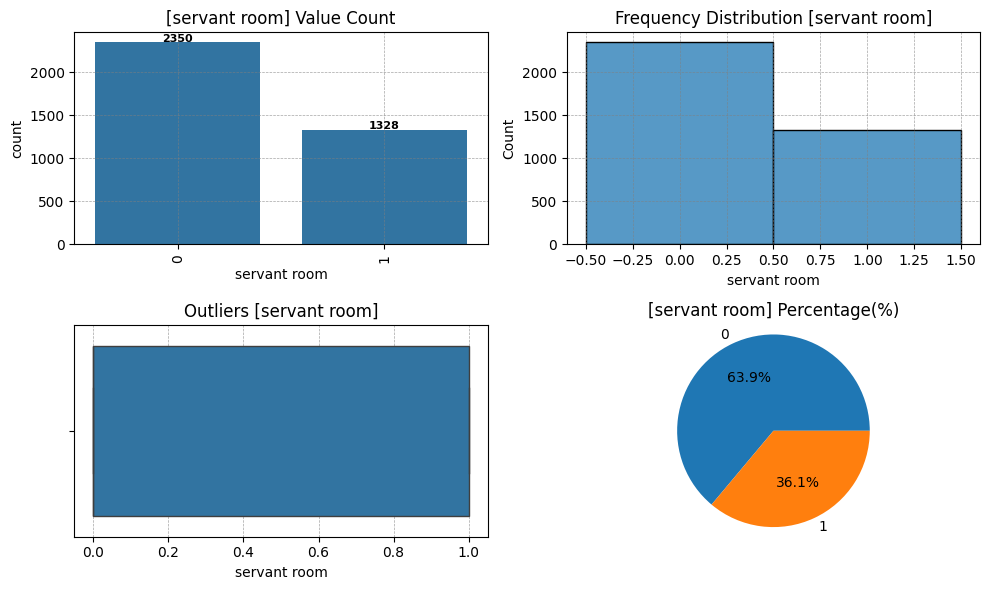

Considered Descrete - Low Cardinality: store room(int64)


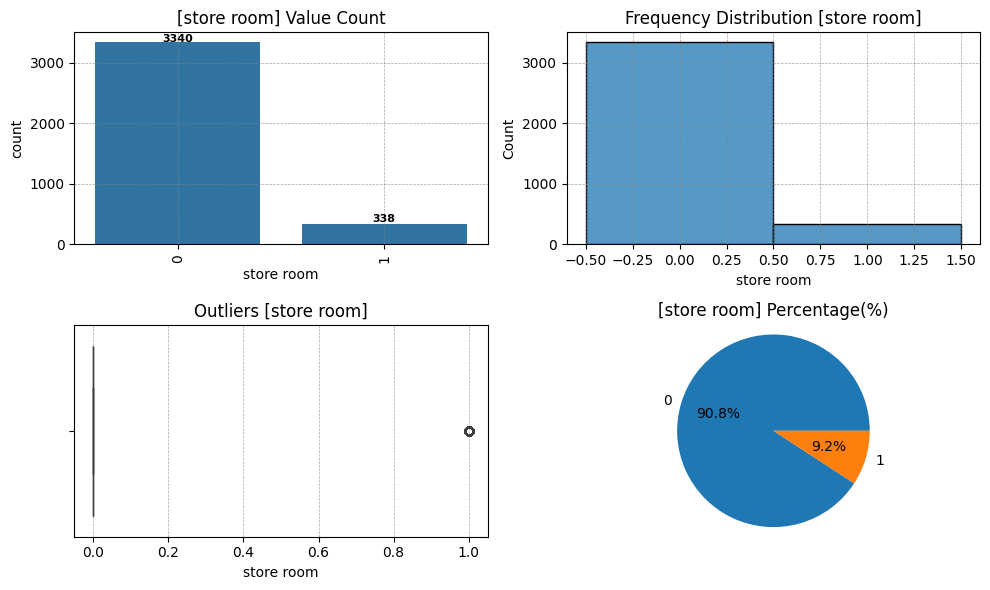

Considered Descrete - Low Cardinality: pooja room(int64)


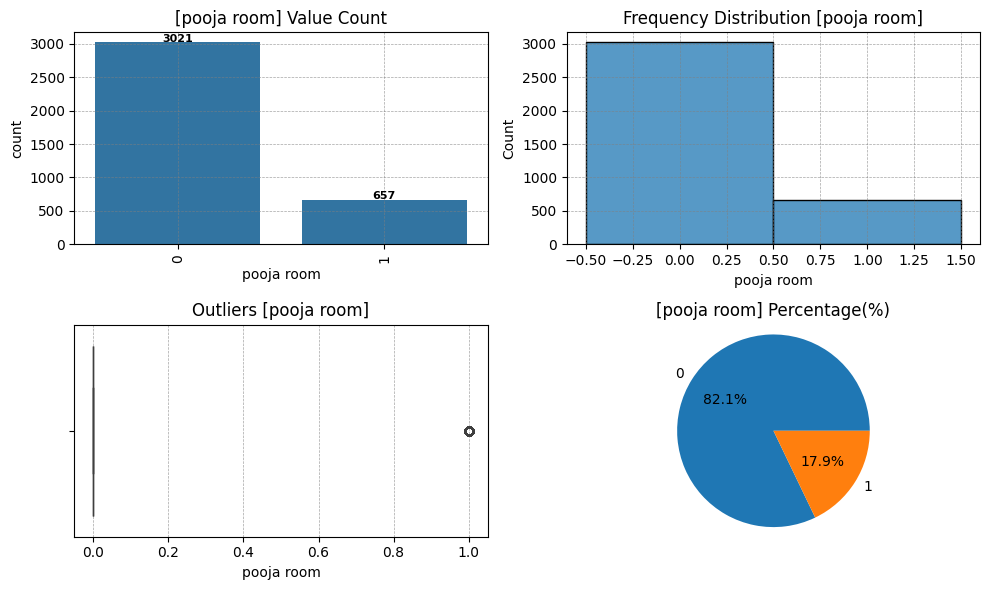

Considered Descrete - Low Cardinality: others(int64)


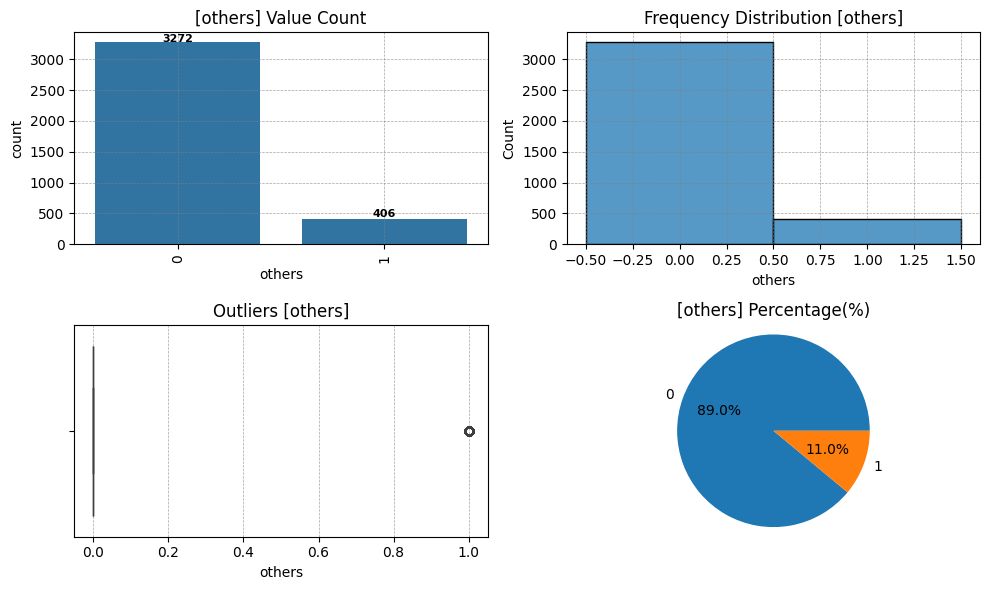

Considered Descrete - Low Cardinality: furnishing_type(int64)


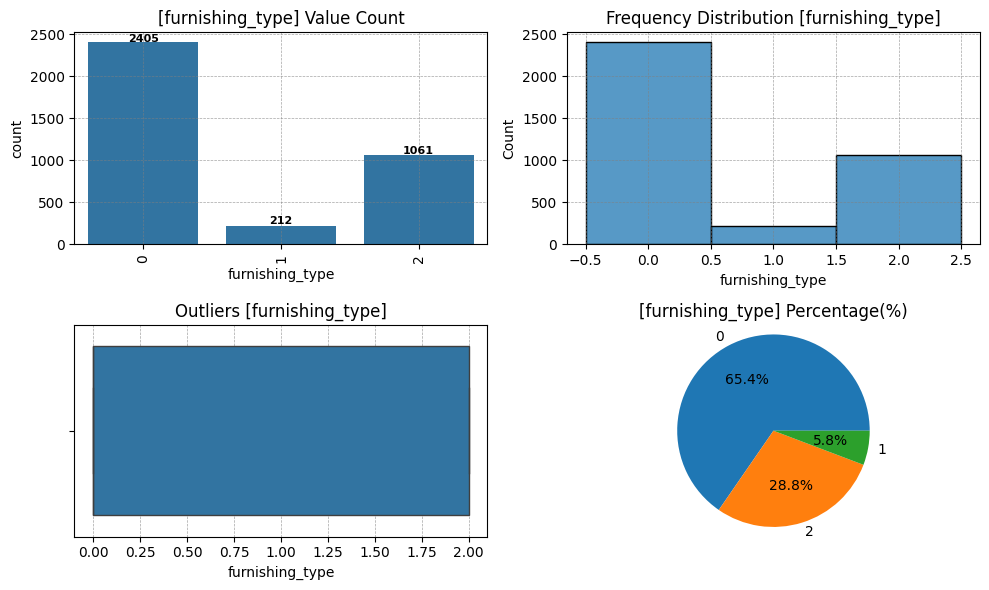

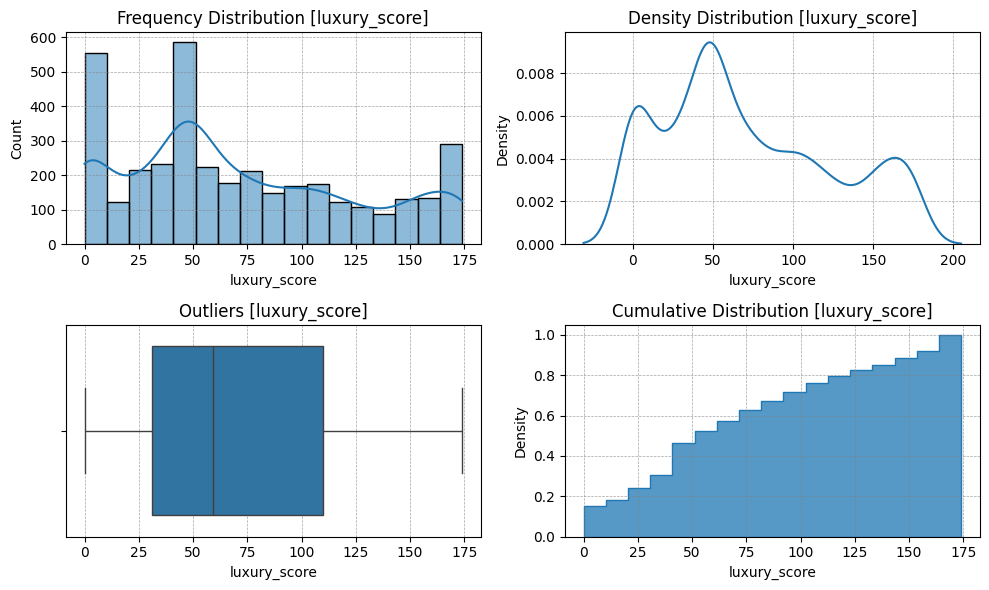

In [17]:
for each in numerical_columns:
    df_uni.NumericalFeatureAnalysis(each)

### Since Our Output Data is highly Skewed, Log Transformation Experiment for Normal distribution 


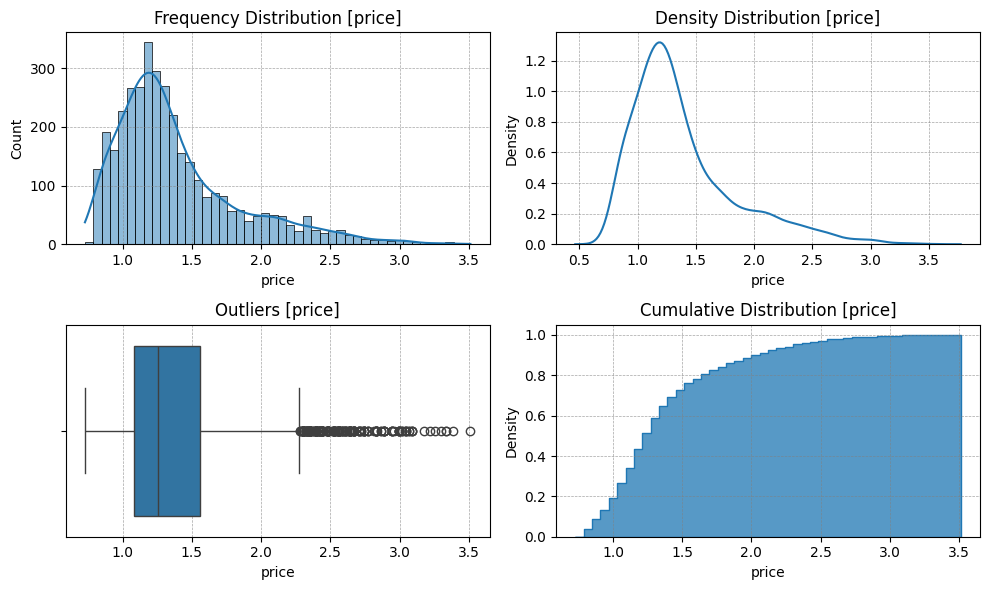

In [18]:
log_transfored_df = df.copy()
log_transfored_df['price'] = np.log1p(log_transfored_df['price'] + 1)
log_transfored_df =  UnivariateAnalysis(log_transfored_df)
log_transfored_Observation, log_transfored_outliers  = log_transfored_df.NumericalFeatureAnalysis('price')

# 3. Bivariate Analysis 

### ------------------- Categorical Vs Numerical ---------------------------

#### property_type and price Analysis (Categorical and Numerical)

categorical_columns= ['property_type', 'society', 'sector', 'areaWithType', 'balcony', 'facing', 'agePossession']
numerical_columns= ['price', 'price_per_sqft', 'area', 'bedRoom', 'bathroom', 'floorNum', 'super_built_up_area', 'built_up_area', 'carpet_area', 'study room', 'servant room', 'store room', 'pooja room', 'others', 'furnishing_type', 'luxury_score']


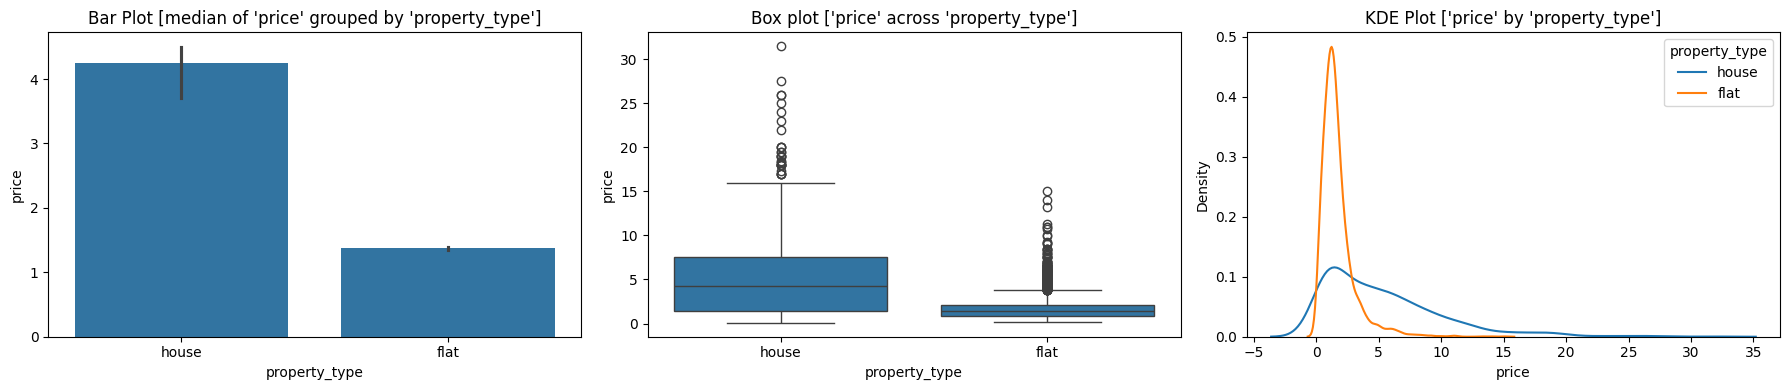

In [19]:
bi_df = BivariateAnalysis(df)
print(bi_df)
bi_df.CategoricalNumericalBivar(cat_col ='property_type', num_col='price')

#### property_type and built_up_area analysis (Numerical & Categorical)

categorical_columns= ['property_type', 'society', 'sector', 'areaWithType', 'balcony', 'facing', 'agePossession']
numerical_columns= ['price', 'price_per_sqft', 'area', 'bedRoom', 'bathroom', 'floorNum', 'super_built_up_area', 'built_up_area', 'carpet_area', 'study room', 'servant room', 'store room', 'pooja room', 'others', 'furnishing_type', 'luxury_score']


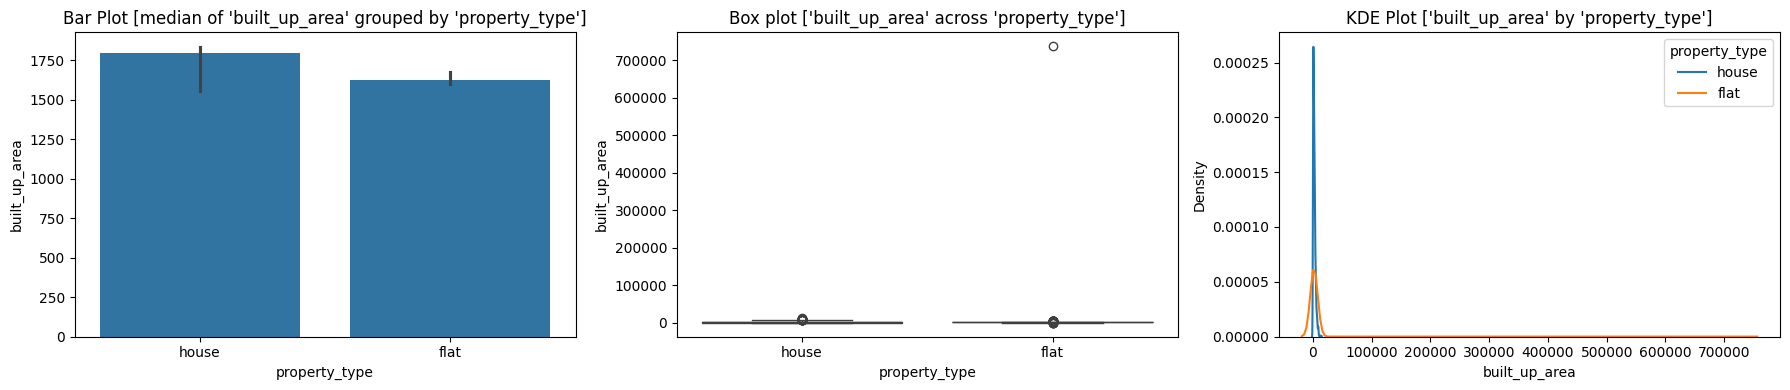

In [20]:
print(bi_df)
bi_df.CategoricalNumericalBivar(cat_col ='property_type', num_col='built_up_area')

#### property_type and built_up_area analysis (Numerical & Categorical)

categorical_columns= ['property_type', 'society', 'sector', 'areaWithType', 'balcony', 'facing', 'agePossession']
numerical_columns= ['price', 'price_per_sqft', 'area', 'bedRoom', 'bathroom', 'floorNum', 'super_built_up_area', 'built_up_area', 'carpet_area', 'study room', 'servant room', 'store room', 'pooja room', 'others', 'furnishing_type', 'luxury_score']


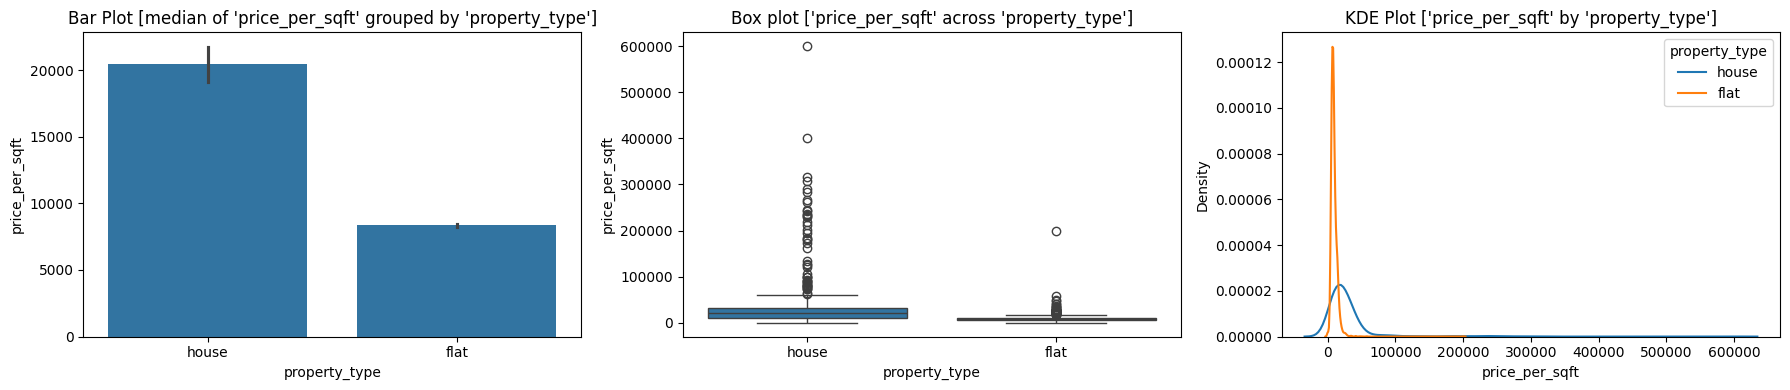

In [21]:
print(bi_df)
bi_df.CategoricalNumericalBivar(cat_col ='property_type', num_col='price_per_sqft')

In [22]:
df[df['price_per_sqft'] > 100000][['property_type','society','sector','price','price_per_sqft','area','areaWithType', 'super_built_up_area', 'built_up_area', 'carpet_area']]


,property_type,society,sector,price,price_per_sqft,area,areaWithType,super_built_up_area,built_up_area,carpet_area
23,house,independent,sector 38,8.00,230547.0,347.0,Built Up area: 347 (32.24 sq.m.)Carpet area: 2...,NaN,347.0,215.0
32,house,unitech uniworld resorts,sector 33,9.50,173992.0,546.0,Plot area 546(50.73 sq.m.),NaN,546.0,NaN
38,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),NaN,400.0,NaN
91,flat,ambience caitriona,sector 24,14.00,200000.0,700.0,Built Up area: 700 (65.03 sq.m.),NaN,700.0,NaN
267,house,independent,sector 55,1.45,241666.0,60.0,Plot area 60(5.57 sq.m.),NaN,60.0,NaN
427,house,independent,sector 54,3.75,234375.0,160.0,Plot area 160(14.86 sq.m.),NaN,160.0,NaN
572,house,ardee city,sector 52,5.50,183333.0,300.0,Plot area 300(27.87 sq.m.),NaN,300.0,NaN
1036,house,independent,sector 12,6.00,315789.0,190.0,Plot area 190(17.65 sq.m.)Carpet area: 1600 sq...,NaN,NaN,1600.0
1038,house,dlf the grove,sector 54,5.70,211111.0,270.0,Built Up area: 270 (25.08 sq.m.),NaN,270.0,NaN
1374,house,vatika india next,sector 82,7.00,194444.0,360.0,Plot area 360(33.45 sq.m.)Built Up area: 3900 ...,NaN,3900.0,3743.0


#### property_type and floorNum Analysis (Categorical & Numerical)

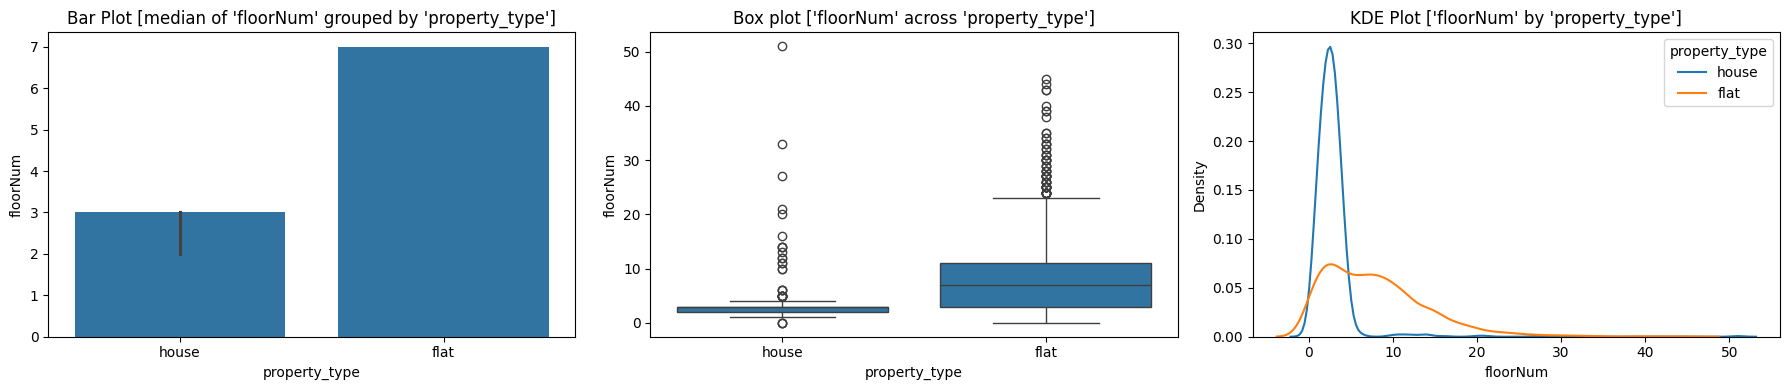

In [23]:
bi_df.CategoricalNumericalBivar(cat_col ='property_type', num_col='floorNum')

#### property_type and luxury_score Analysis (Categorical & Numerical)

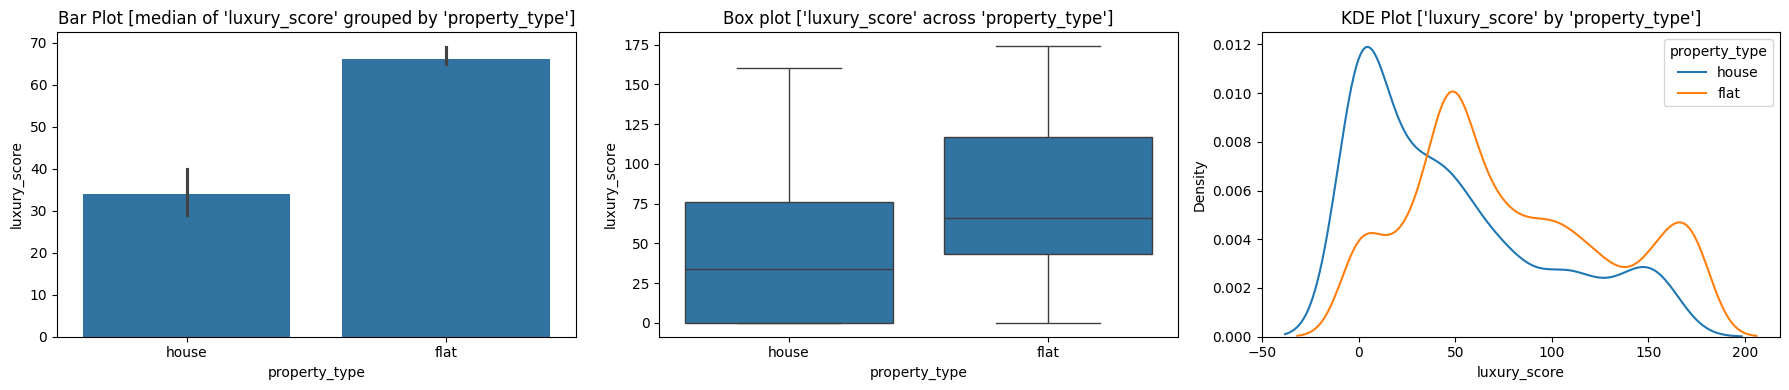

In [24]:
bi_df.CategoricalNumericalBivar(cat_col ='property_type', num_col='luxury_score')


#### agePossession and price Analysis (Categorical & Numerical)

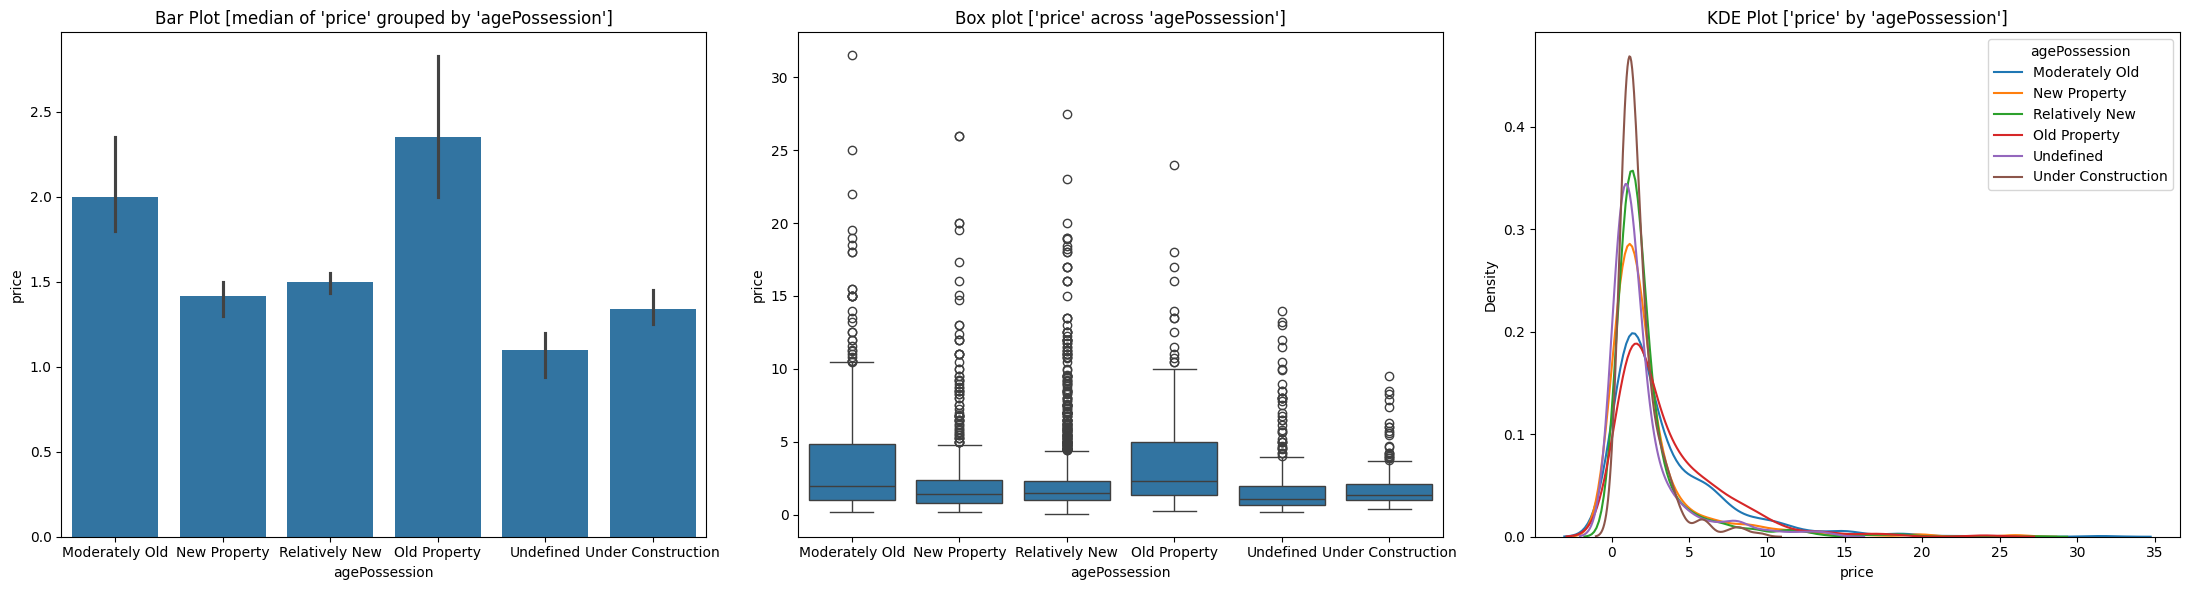

In [25]:
bi_df.CategoricalNumericalBivar(cat_col ='agePossession', num_col='price', figsize=(22,6))

#### agePossession and area Analysis (Categorical & Numerical)

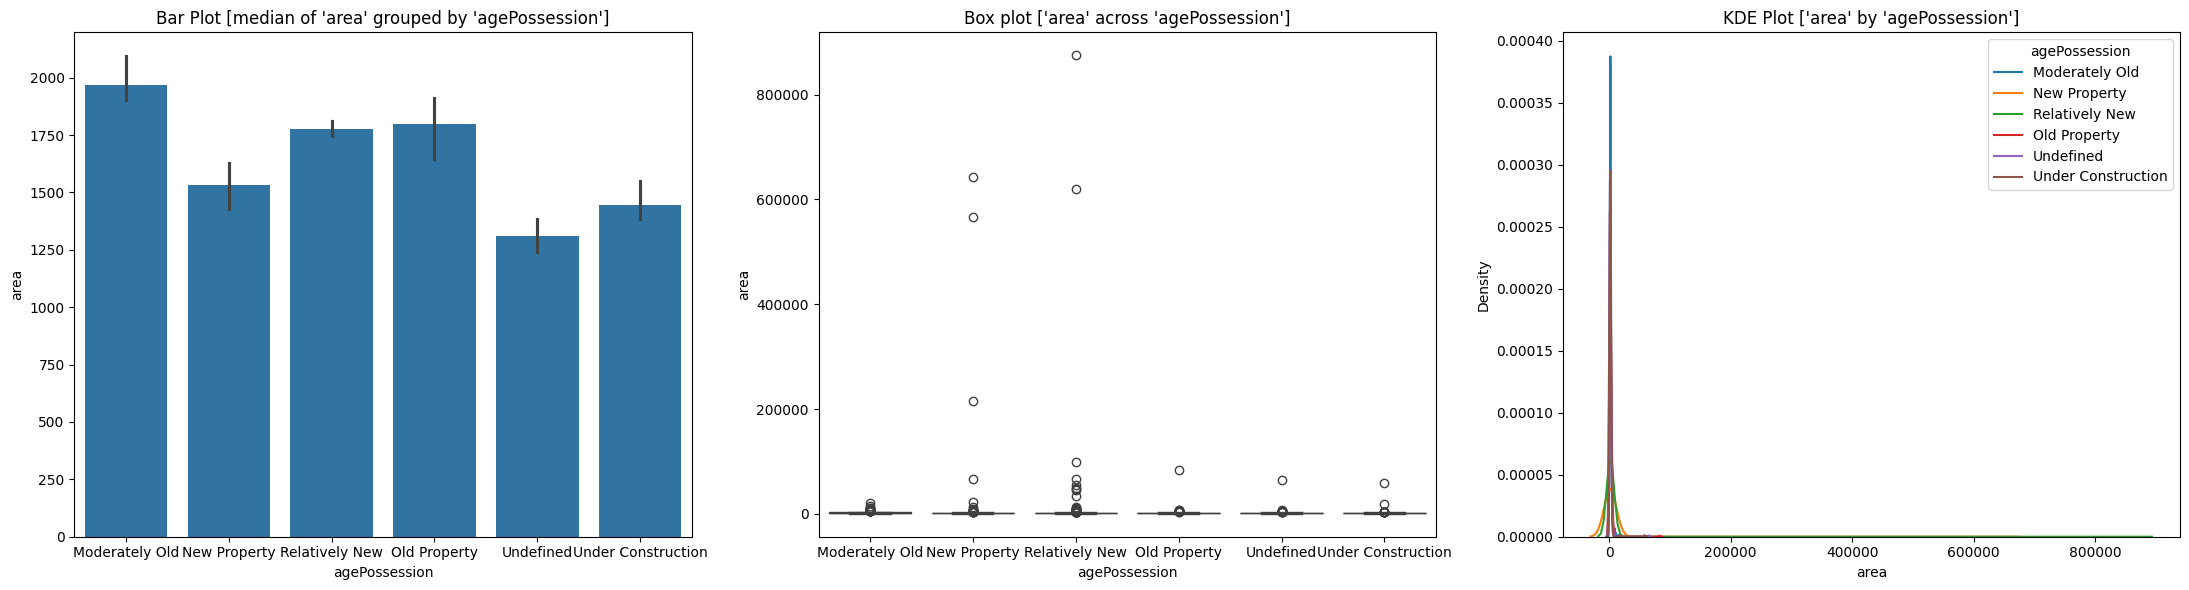

In [26]:
bi_df.CategoricalNumericalBivar(cat_col ='agePossession', num_col='area', figsize=(22,6))

#### property_type and furnishing_type Analysis (Categorical & Numerical)

Considered Descrete - Low Cardinality: furnishing_type (int64)


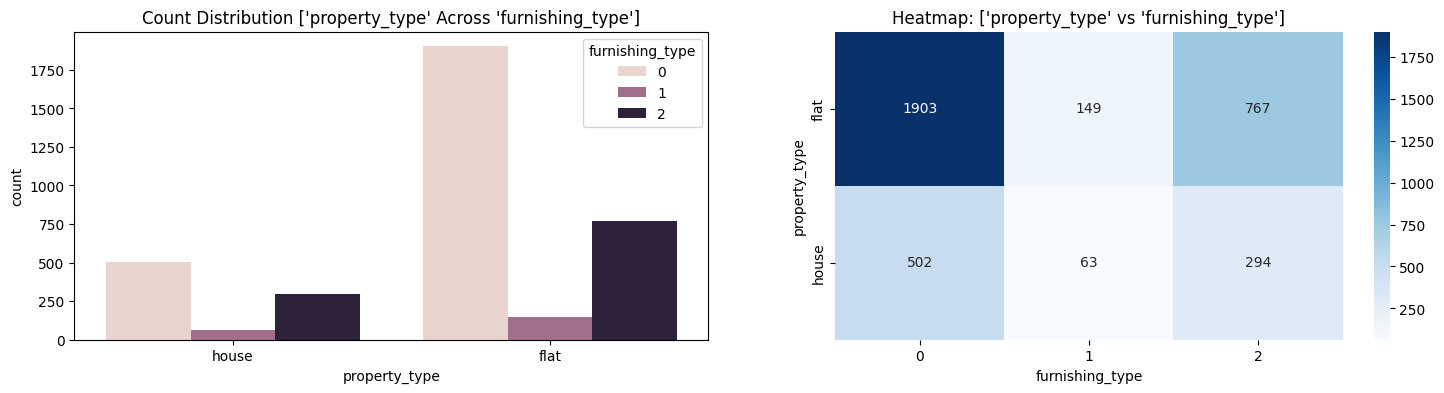

In [27]:
bi_df.CategoricalNumericalBivar(cat_col='property_type', num_col='furnishing_type')

### ------------------------ Categorical Vs Categorical --------------------------------

#### property_type and agePossession Analysis (Categorical & Categorical)

categorical_columns= ['property_type', 'society', 'sector', 'areaWithType', 'balcony', 'facing', 'agePossession']
numerical_columns= ['price', 'price_per_sqft', 'area', 'bedRoom', 'bathroom', 'floorNum', 'super_built_up_area', 'built_up_area', 'carpet_area', 'study room', 'servant room', 'store room', 'pooja room', 'others', 'furnishing_type', 'luxury_score']


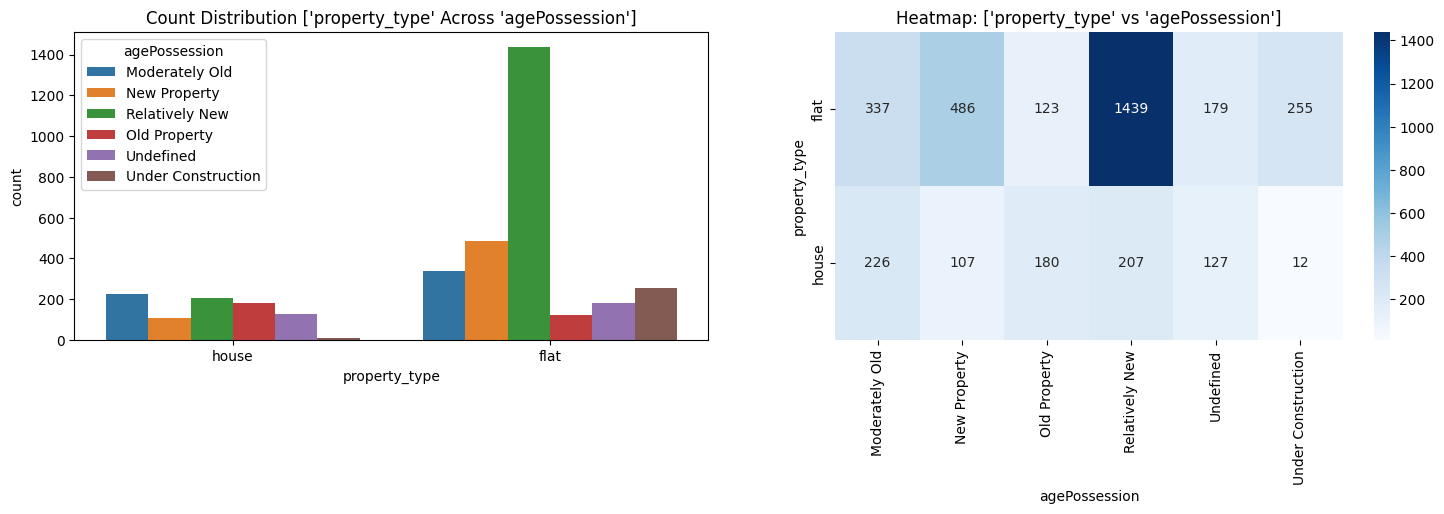

In [28]:
print(bi_df)
test = bi_df.CategoricalBivar(cat_col1='property_type', cat_col2='agePossession')

### --------------------- Numerical Vs Numerical -----------------------------------------------

In [29]:
## Filtered Data Frame
df_10000 = df[df['area']<10000]

#### area and price grouped by bedRoom Analysis (Numerical Vs Numerical)

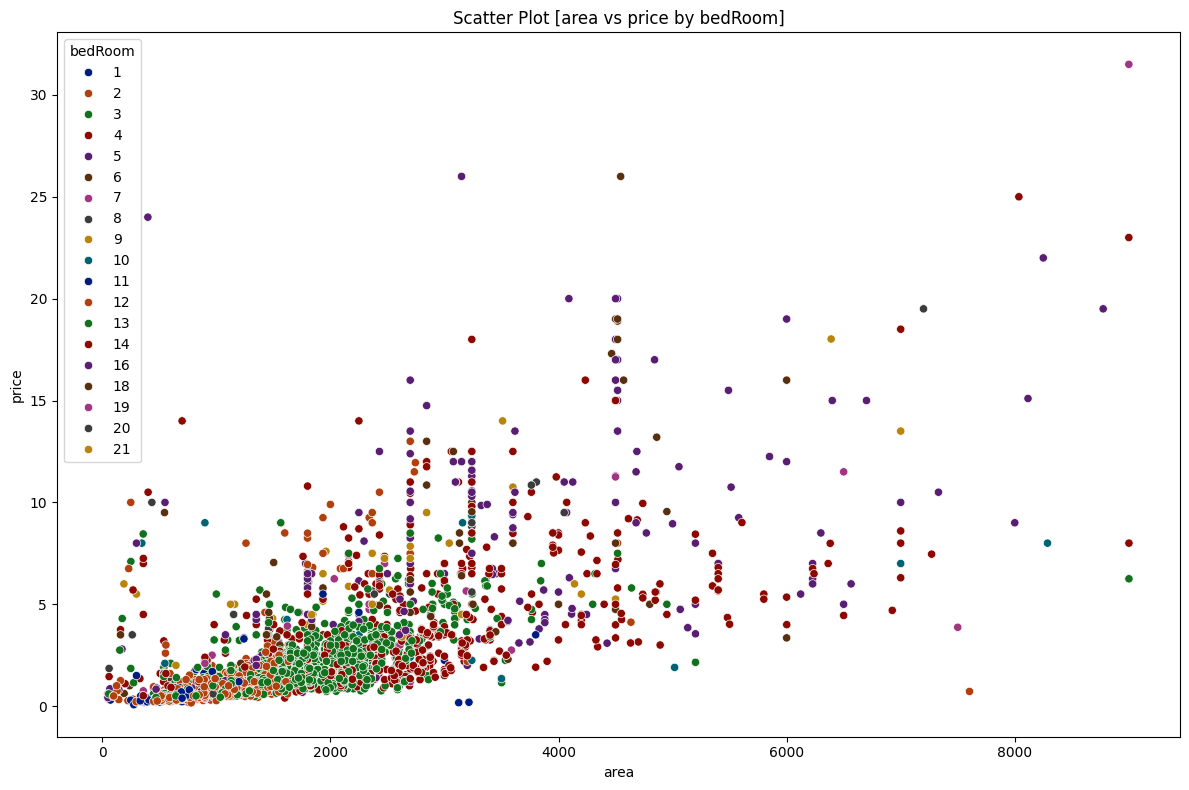

In [30]:
bi_df = BivariateAnalysis(df_10000)
bi_df.NumericBivariate(num_col1='area', num_col2='price', hue='bedRoom')

#### area and price grouped by agePossession Analysis (Numerical Vs Numerical)

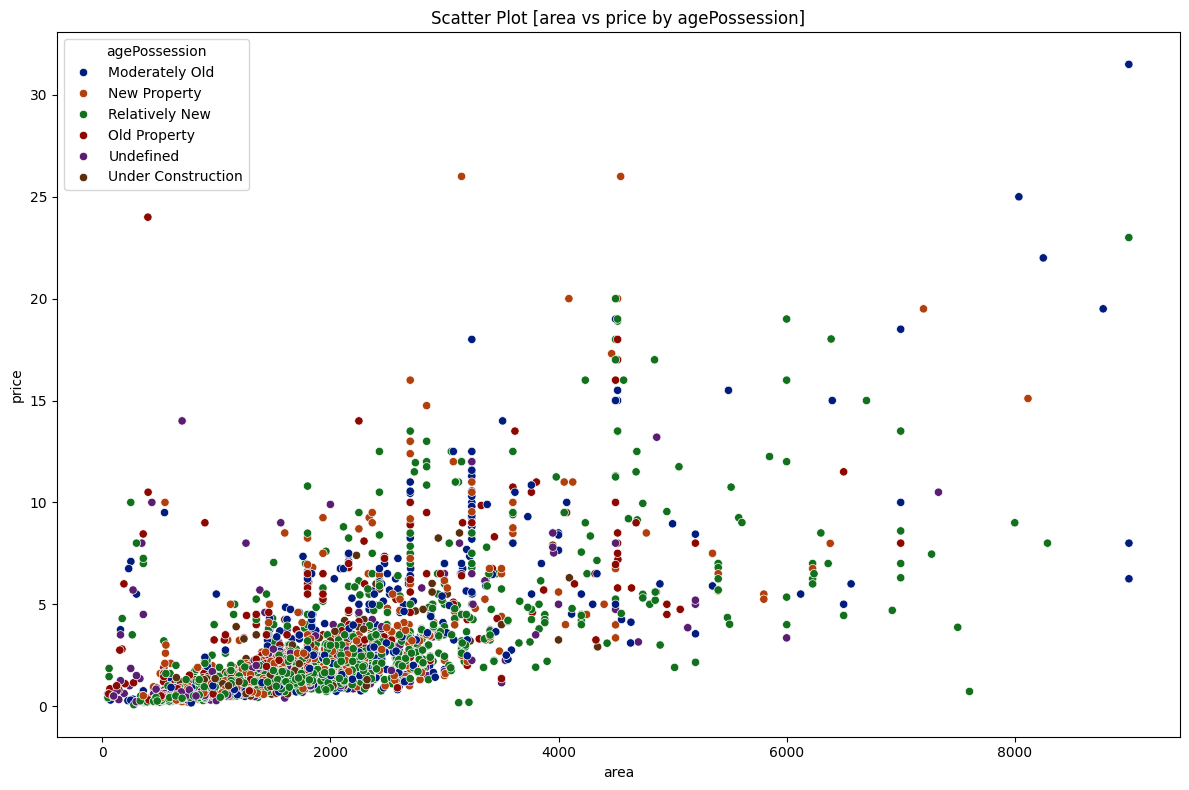

In [31]:
bi_df = BivariateAnalysis(df_10000)
bi_df.NumericBivariate(num_col1='area', num_col2='price', hue='agePossession')

#### area and price grouped by furnishing_type Analysis (Numerical Vs Numerical)

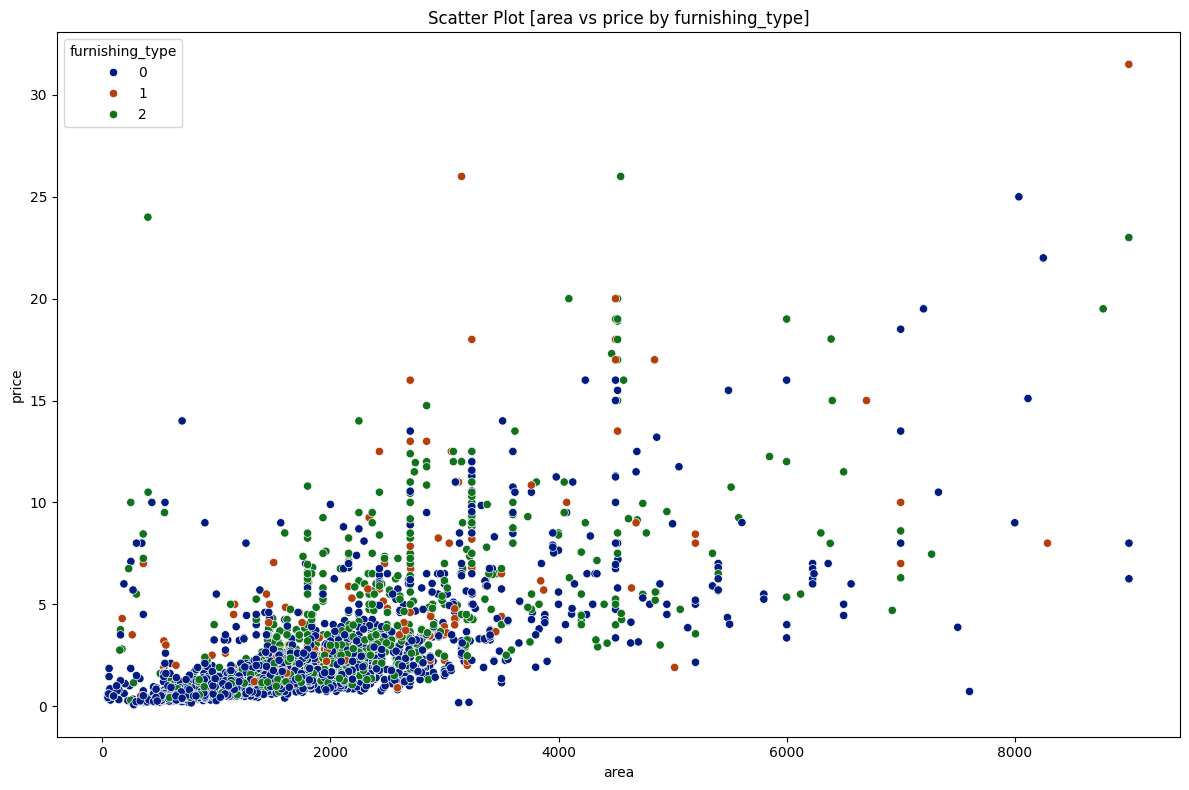

In [32]:
bi_df = BivariateAnalysis(df_10000)
bi_df.NumericBivariate(num_col1='area', num_col2='price', hue='furnishing_type')

#### bedRoom and price Analysis (Numerical Vs Numerical)

Considered Descrete - Low Cardinality: bedRoom (int64)


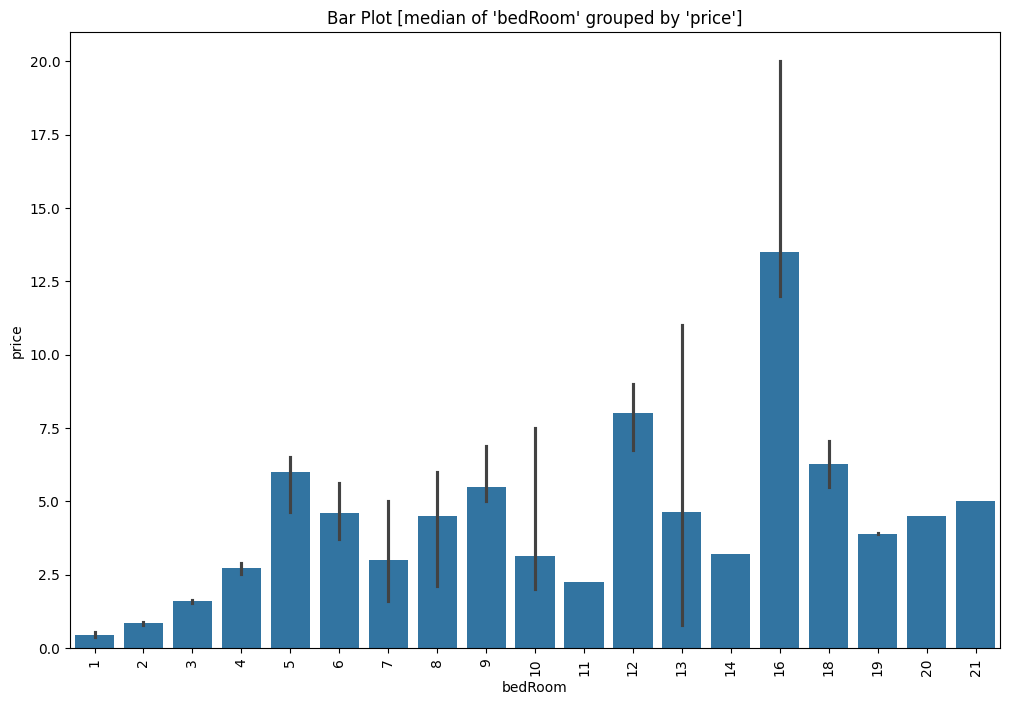

In [33]:
bi_df.NumericBivariate(num_col1='bedRoom', num_col2='price')

#### furnishing_type and price Analysis (Numerical Vs Numerical)

Considered Descrete - Low Cardinality: furnishing_type (int64)


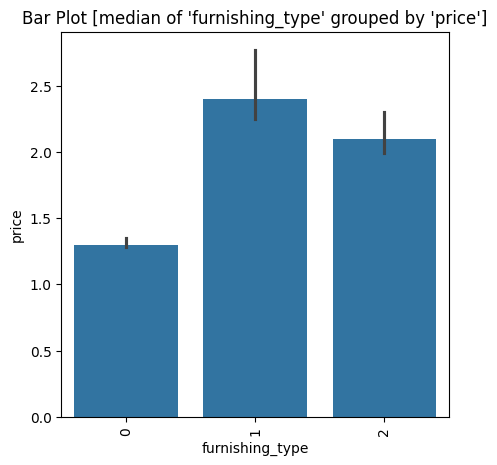

In [34]:
bi_df.NumericBivariate(num_col1='furnishing_type', num_col2='price',figsize=(5,5))

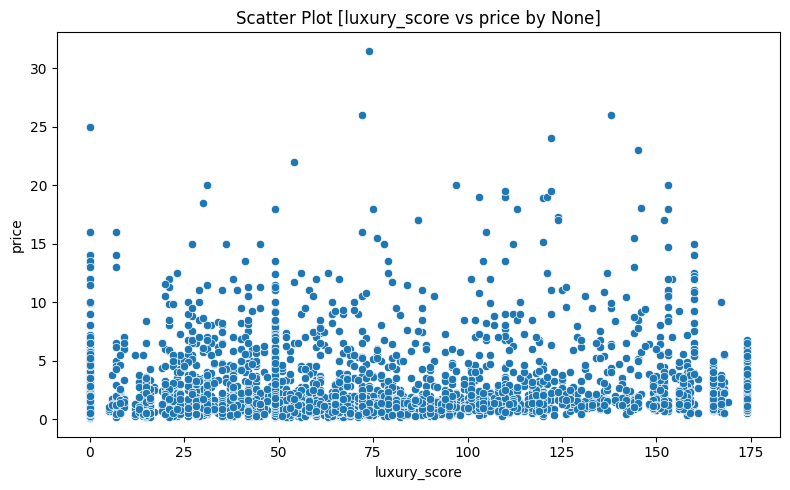

In [35]:
bi_df.NumericBivariate(num_col1='luxury_score', num_col2='price',figsize=(8,5))

In [36]:
# import dtale
# d = dtale.show(df)
# d.open_browser()

